In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [293]:
df = pd.read_csv('Data/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


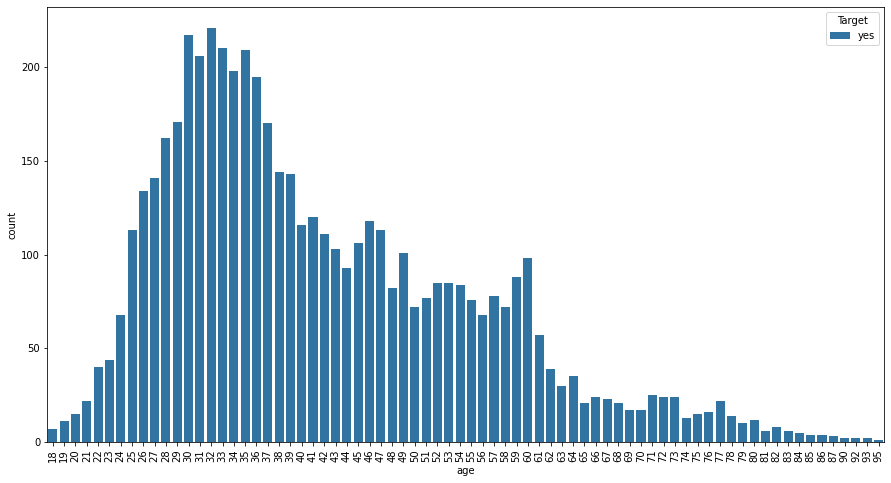

In [294]:
target = df[df['Target']=='yes']

plt.figure(figsize=(15,8))
sns.countplot(x='age', hue='Target', data=target)
plt.xticks(rotation=90);

In [295]:
def age_segmenting(x):
    if x>=18 and x<=25:
        return '18-25'
    
    elif x>25 and x<=40:
        return '25-40'
    
    elif x>40 and x<=65:
        return '40-65'
    
    else:
        return '65+'

df['age'] = df['age'].map(age_segmenting)

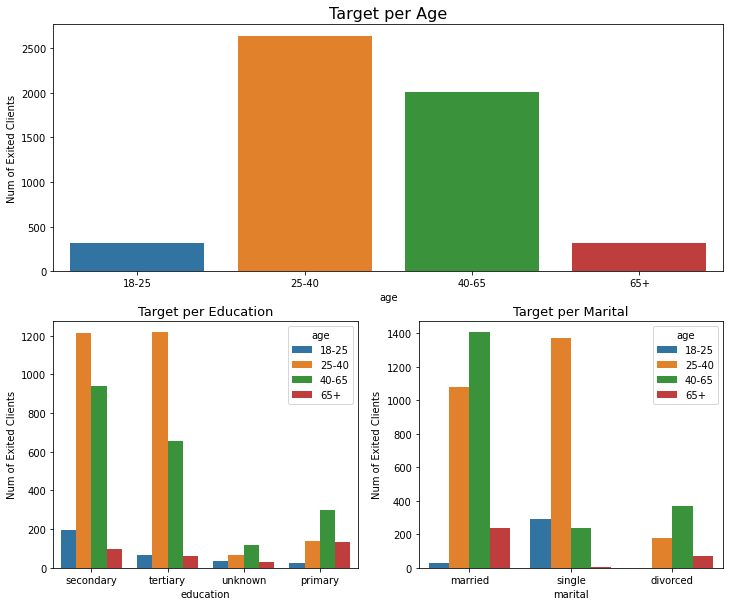

In [296]:
target = df[df['Target']=='yes']

fig = plt.figure(figsize=(12,10))
spec2 = GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0:])
ax2 = fig.add_subplot(spec2[1, 0])
ax3 = fig.add_subplot(spec2[1, 1])


ax1.set_title('Target per Age', size=16)
sns.countplot(x='age', order=['18-25','25-40','40-65','65+'], data=target, ax=ax1)
ax1.set_ylabel('Num of Exited Clients')

ax2.set_title('Target per Education', size=13)
sns.countplot(x='education', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax2)
ax2.set_ylabel('Num of Exited Clients')

ax3.set_title('Target per Marital', size=13)
sns.countplot(x='marital', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax3)
ax3.set_ylabel('Num of Exited Clients')


plt.show()

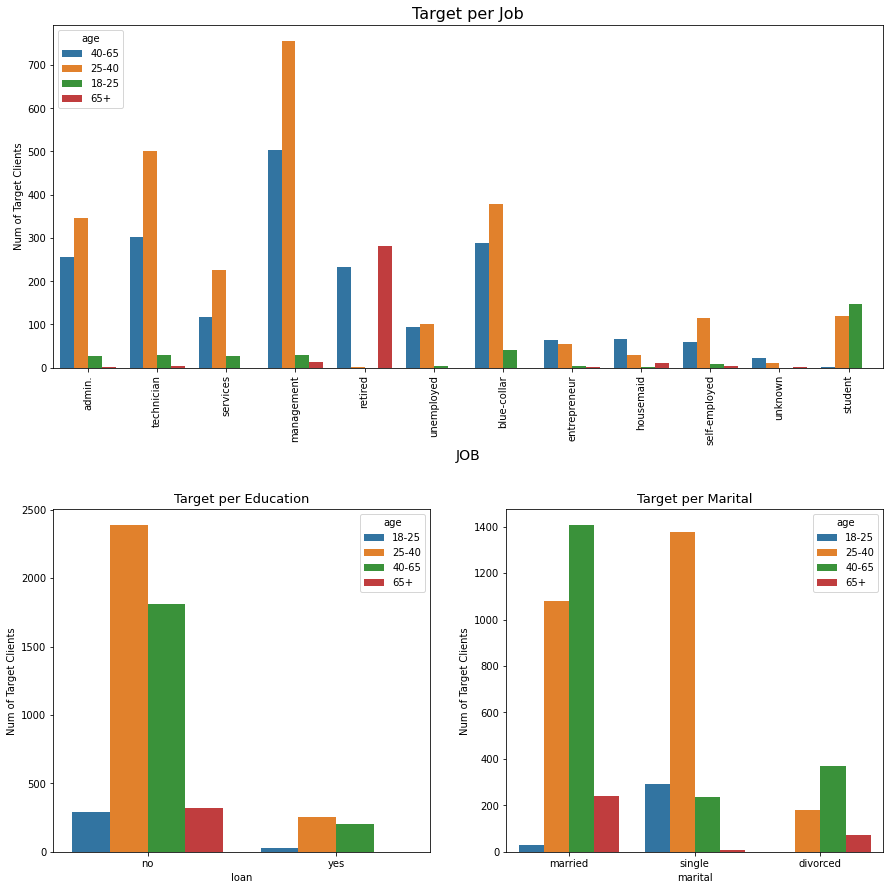

In [297]:
target = df[df['Target']=='yes']

fig = plt.figure(figsize=(13,13))
spec2 = GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0:])
ax2 = fig.add_subplot(spec2[1, 0])
ax3 = fig.add_subplot(spec2[1, 1])


ax1.set_title('Target per Job', size=16)
sns.countplot(x='job', hue='age', data=target, ax=ax1)
ax1.set_ylabel('Num of Target Clients')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90);
ax1.set_xlabel(ax1.get_xlabel().upper(), size=14)

ax2.set_title('Target per Education', size=13)
sns.countplot(x='loan', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax2)
ax2.set_ylabel('Num of Target Clients')

ax3.set_title('Target per Marital', size=13)
sns.countplot(x='marital', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax3)
ax3.set_ylabel('Num of Target Clients')

fig.tight_layout(pad=3.0)

plt.show()

In [298]:
def encoding_cat(data, *out):
    """This function converts all the categorical values of the DataFrame "data" into [0,1].
    
       It uses OneHotEncoder for multiple categorical values (>2)
       It uses LabelEncoder for binary categorical values
       
       - data: Pandas DataFrame
       - out: Columns of DataFrame that we don't want to convert
    """
    columns = data.keys()
    
    for col in columns:
        # Sometime not all the columns are need
        if col not in out:
            labels = list(data[col].unique())
            labels.sort()
            
            # Only with categorical values
            if isinstance(labels[0], str):
                
                # OneHotEncoder
                if len(labels)>2:
                    ohe = OneHotEncoder(sparse=False)
                    data[labels]=ohe.fit_transform(data[[col]])
                    data.drop(columns=col, inplace=True)
                
                # LabelEncoder
                else:
                    le = LabelEncoder()
                    data[col]=le.fit_transform(data[col])
    return data

encoding_cat(df, 'month')

,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,married,single,primary,secondary,tertiary,cellular,telephone,failure,other,success
0,0,2143,1,0,5,may,261,1,-1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,29,1,0,5,may,151,1,-1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,1,5,may,76,1,-1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1506,1,0,5,may,92,1,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,5,may,198,1,-1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,0,17,nov,977,3,-1,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
45207,0,1729,0,0,17,nov,456,2,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45208,0,5715,0,0,17,nov,1127,5,184,3,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,0,668,0,0,17,nov,508,4,-1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [299]:
def month_trans(x):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    values = np.arange(0,12)
    
    converter = {}
    for mon, val in zip(months, values):
        converter[mon] = val
        
    return converter[x]

df['month'] = df['month'].apply(month_trans)

month_max = df['month'].max()

df['month'] = df['month'].apply(lambda x: np.sin(x/month_max))
df['day'] = df['day'].apply(lambda x: np.sin(x/month_max))